<a href="https://colab.research.google.com/github/UTEDungNguyen/Artificial-Intelligent/blob/main/Five_Types_Of_Flowers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam
from keras.layers import LeakyReLU
from os import listdir
from numpy import asarray,save
from keras.utils import load_img, img_to_array
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [16]:
train = ImageDataGenerator(rescale =1.0/255.0)
test = ImageDataGenerator(rescale=1.0/255.0)

In [17]:
train_data = train.flow_from_directory('/content/drive/MyDrive/Five Types Of Flowers /dulieu5loaihoa/train', target_size=(120,120), class_mode='categorical')
test_data = test.flow_from_directory('/content/drive/MyDrive/Five Types Of Flowers /dulieu5loaihoa/test', target_size=(120,120), class_mode='categorical')
print('train_index :', train_data.class_indices)
print('test_index:', test_data.class_indices)

Found 2940 images belonging to 5 classes.
Found 114 images belonging to 5 classes.
train_index : {'common_daisy': 0, 'lotus': 1, 'pink': 2, 'rose': 3, 'water_lily': 4}
test_index: {'common_daisy': 0, 'lotus': 1, 'pink': 2, 'rose': 3, 'water_lily': 4}


In [18]:
model= Sequential()
#CNN1
model.add(Conv2D(32, kernel_size=(3,3), activation='linear',input_shape=(120,120,3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#CNN2
model.add(Conv2D(64,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))
#CNN3
model.add(Conv2D(128,(3,3),activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2,2), padding='same'))

batch_size=128
epochs =30
classes =5

In [19]:
# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(256, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(classes, activation= 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 120, 120, 32)      896       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 120, 120, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [20]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 120, 120, 32)      896       
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 120, 120, 32)      0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 60, 60, 32)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 leaky_re_lu_7 (LeakyReLU)   (None, 60, 60, 64)        0         
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                  

In [21]:
his=model.fit(train_data,epochs=30,batch_size=128,verbose=1,validation_data=test_data)
eva=model.evaluate(train_data,verbose=0)
print('Train Loss', eva[0])
print('Train Accuracy', eva[1])

Epoch 1/30
92/92 [==============================] - 482s 5s/step - loss: 1.0230 - accuracy: 0.5915 - val_loss: 1.3147 - val_accuracy: 0.5526
Epoch 2/30
92/92 [==============================] - 22s 239ms/step - loss: 0.7536 - accuracy: 0.7303 - val_loss: 1.1562 - val_accuracy: 0.6667
Epoch 3/30
92/92 [==============================] - 23s 251ms/step - loss: 0.5267 - accuracy: 0.8139 - val_loss: 0.6194 - val_accuracy: 0.8158
Epoch 4/30
92/92 [==============================] - 23s 253ms/step - loss: 0.3612 - accuracy: 0.8745 - val_loss: 0.4636 - val_accuracy: 0.8070
Epoch 5/30
92/92 [==============================] - 23s 249ms/step - loss: 0.2248 - accuracy: 0.9204 - val_loss: 0.7652 - val_accuracy: 0.7807
Epoch 6/30
92/92 [==============================] - 22s 237ms/step - loss: 0.1531 - accuracy: 0.9490 - val_loss: 0.0998 - val_accuracy: 0.9649
Epoch 7/30
92/92 [==============================] - 23s 244ms/step - loss: 0.0815 - accuracy: 0.9755 - val_loss: 0.0393 - val_accuracy: 0.9912
E

In [22]:
model.save('/content/drive/MyDrive/Model save/Five_type_of_Flowers.h5')

<ipython-input-23-bd6aee40bd19>:6: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='orange')


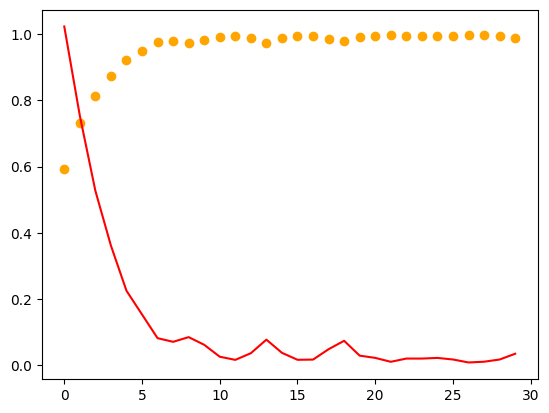

In [23]:
accuracy = his.history['accuracy']
loss = his.history['loss']
epochs=range(len(accuracy))

import matplotlib.pyplot as plt
plt.plot(epochs, accuracy, 'bo', label='Training accuracy', color='orange')
plt.plot(epochs,loss , 'r', label ='Training loss')
plt.show()

In [24]:
from keras.models import load_model
# load model save
model_flowers= load_model('/content/drive/MyDrive/Model save/Five_type_of_Flowers.h5')

1/1 [==============================] - 0s 472ms/step
Loại hoa này là : Pink


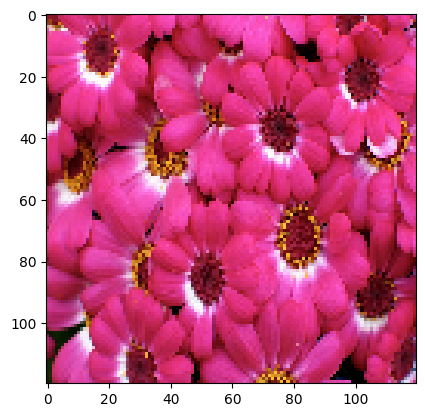

1/1 [==============================] - 0s 28ms/step
Loại hoa này là : Daisy


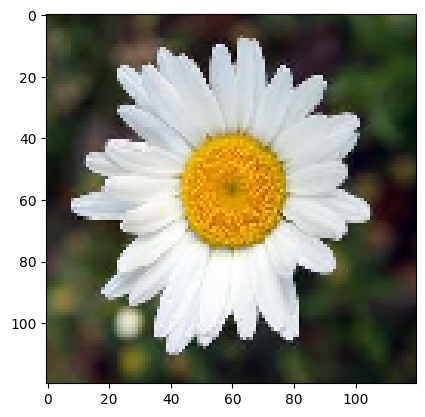

1/1 [==============================] - 0s 18ms/step
Loại hoa này là : Lotus


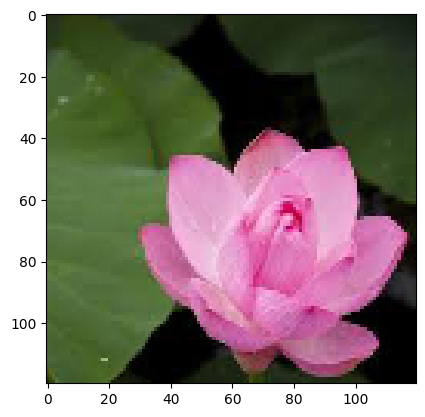

1/1 [==============================] - 0s 21ms/step
Loại hoa này là : Daisy


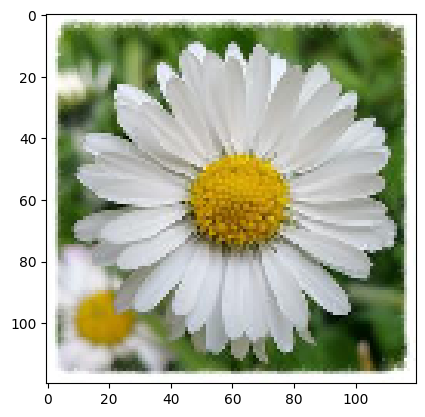

1/1 [==============================] - 0s 19ms/step
Loại hoa này là : Rose


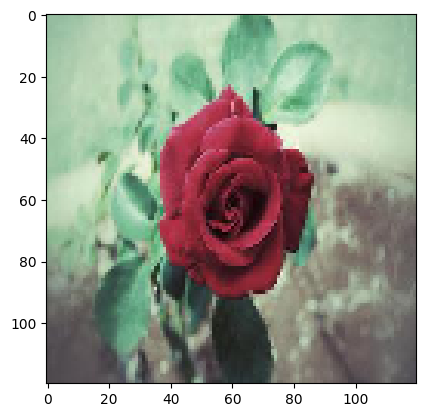

1/1 [==============================] - 0s 43ms/step
Loại hoa này là : Rose


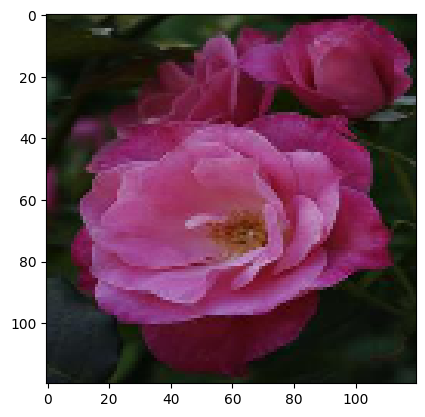

1/1 [==============================] - 0s 31ms/step
Loại hoa này là : Water_Lily


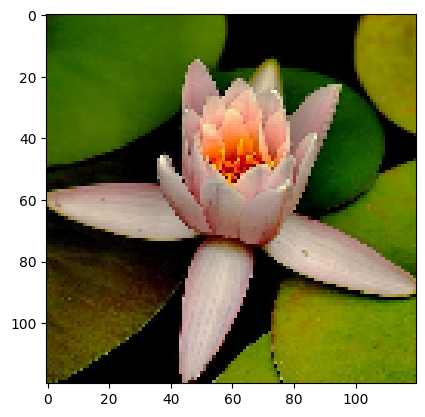

In [25]:
# Đường dẫn thư mục test
test="/content/drive/MyDrive/Five Types Of Flowers /dulieu5loaihoa/Identify_test"

# Tạo tên hiện của các loại hoa
name_flower= ['Daisy','Lotus','Pink','Rose','Water_Lily']

# Quét hết các hình trong đường dẫn và tiến hành dự đoán các loại tiền
for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(120,120), color_mode = 'rgb')
  plt.imshow(img)

  img=img_to_array(img)
  img=img.astype('float32')
  img=img/255
  img=np.expand_dims(img,axis=0)
  result=(model_flowers.predict(img).argmax())

  print("Loại hoa này là :",name_flower[result])
  plt.show()